In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tweets/Tweets.csv


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [129]:
tweets = pd.read_csv('/kaggle/input/tweets/Tweets.csv')

In [130]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42



In [131]:
!pip install pytorch-pretrained-bert

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [132]:
# import the required libraries.

import re
from torch.utils.data import TensorDataset,DataLoader ,SequentialSampler
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange

In [133]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [134]:
tweets.shape

(14640, 15)

In [ ]:
tweets.info

# Data Visualization:

## Ploting the count of different emotions(Positive,Negative,Neutral)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


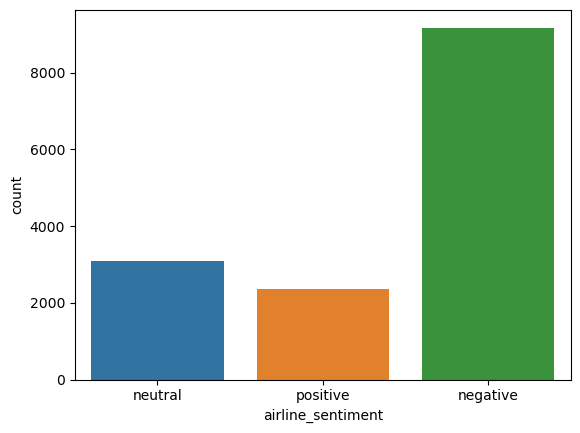

In [135]:
print(tweets['airline_sentiment'].value_counts())
sns.countplot(data=tweets, x='airline_sentiment')
plt.show()


Text(0.5, 1.0, 'Sentiment Proportion')

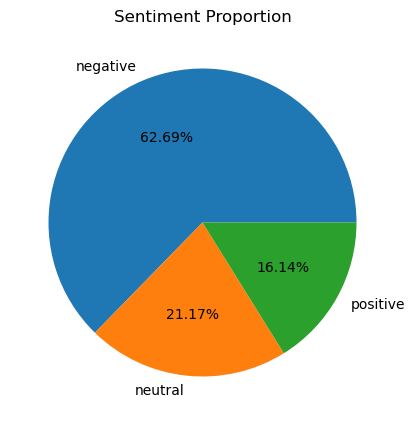

In [136]:
plt.figure(figsize=(10, 5))
plt.pie(tweets['airline_sentiment'].value_counts(),
        labels=tweets['airline_sentiment'].value_counts().index, autopct="%2.2f%%")
plt.title('Sentiment Proportion')


In [137]:
tweets.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

## Plotting the counts of different airline companies

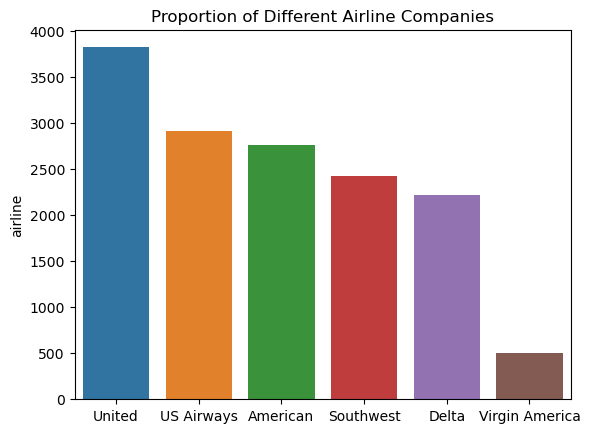

In [138]:

tweets['airline'].value_counts()
sns.barplot(x=tweets['airline'].value_counts().index,
            y=tweets['airline'].value_counts())
plt.title('Proportion of Different Airline Companies')
plt.show()


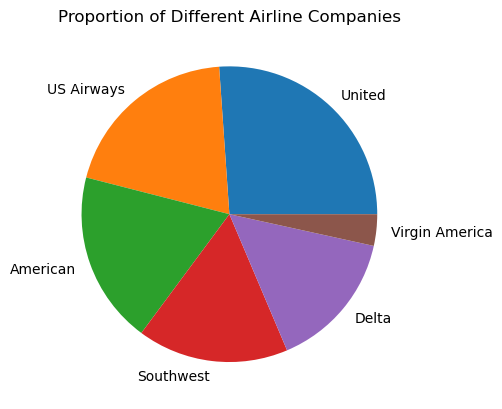

In [139]:

airline_labels = ["United", "US Airways", "American","Southwest","Delta","Virgin America"]
plt.pie(tweets.airline.value_counts(), labels=airline_labels)
plt.title('Proportion of Different Airline Companies')
plt.show()



## Distribution of emotions over different airlines

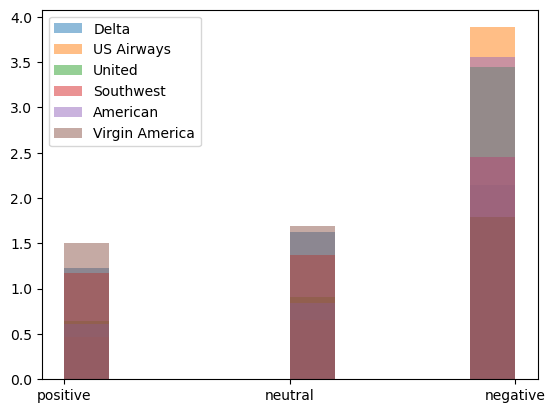

In [140]:
plt.hist(tweets.airline_sentiment[tweets.airline == 'Delta'],
         label='Delta', density=True, alpha=.5)
plt.hist(tweets.airline_sentiment[tweets.airline == 'US Airways'],
         label='US Airways', density=True, alpha=.5)
plt.hist(tweets.airline_sentiment[tweets.airline == 'United'],
         label='United', density=True, alpha=.5)
plt.hist(tweets.airline_sentiment[tweets.airline == 'Southwest'],
         label='Southwest', density=True, alpha=.5)
plt.hist(tweets.airline_sentiment[tweets.airline == 'American'],
         label='American', density=True, alpha=.5)
plt.hist(tweets.airline_sentiment[tweets.airline == 'Virgin America'],
         label='Virgin America', density=True, alpha=.5)
plt.legend()
plt.show()

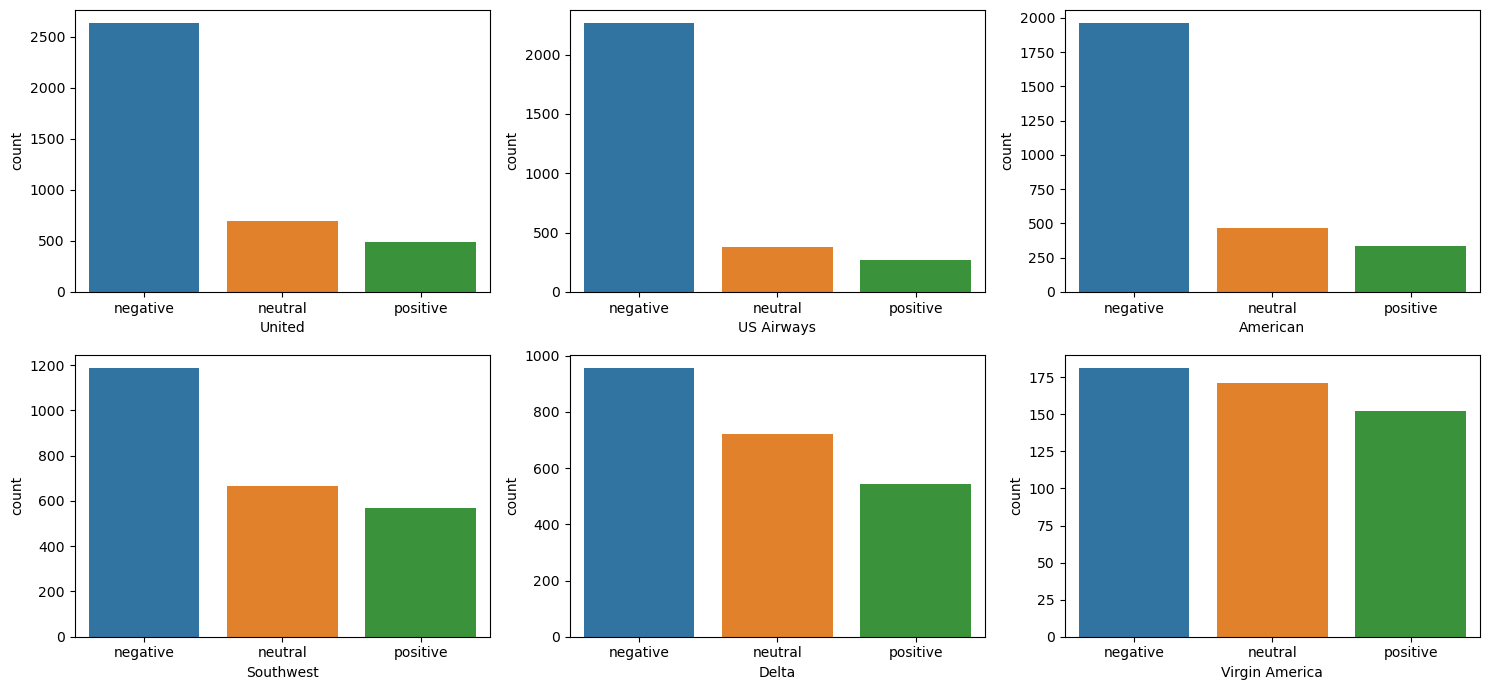

In [141]:
def plot_sentiment(Airline):
    df1 = tweets[tweets['airline'] == Airline]
    count = df1['airline_sentiment'].value_counts().reset_index().rename(
        columns={'index': Airline, 'airline_sentiment': 'count'})
    sns.barplot(data=count, x=Airline, y='count')


plt.figure(figsize=(15, 7))
plt.subplot(2, 3, 1)
plot_sentiment('United')
plt.subplot(2, 3, 2)
plot_sentiment('US Airways')
plt.subplot(2, 3, 3)
plot_sentiment('American')
plt.subplot(2, 3, 4)
plot_sentiment('Southwest')
plt.subplot(2, 3, 5)
plot_sentiment('Delta')
plt.subplot(2, 3, 6)
plot_sentiment('Virgin America')
plt.tight_layout()
plt.show()


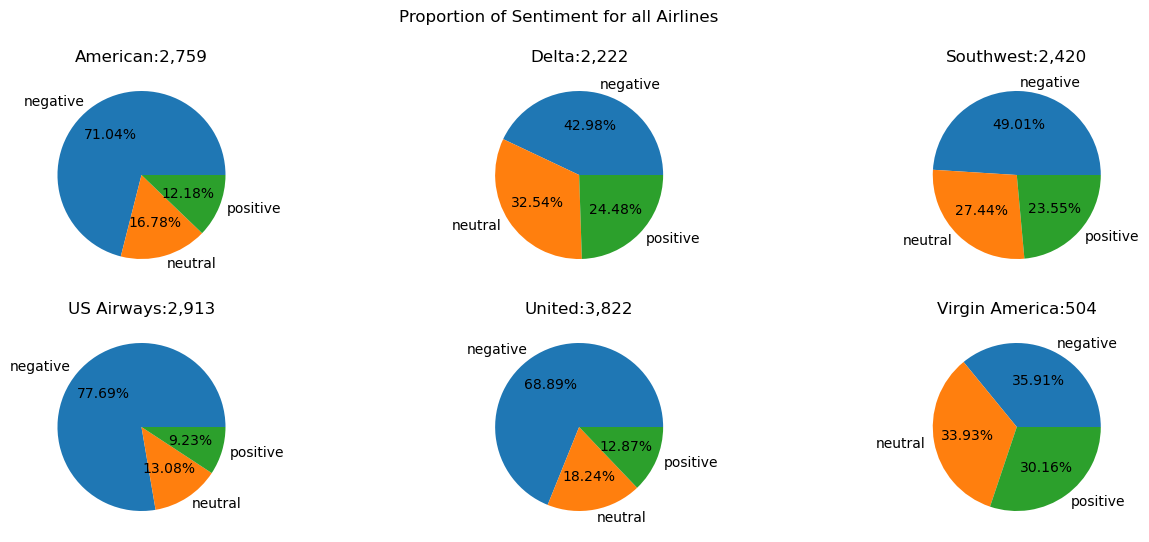

In [142]:
sentiment = tweets.groupby(['airline', 'airline_sentiment'])[
    'airline_sentiment'].count().unstack()
sentiment
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = sentiment.iloc[i]
    ax.pie(x=temp, labels=temp.index, autopct="%2.2f%%")
    ax.set_title(
        f"{sentiment.index[i]}:{format(sentiment.values[i].sum(),',')}")
plt.suptitle('Proportion of Sentiment for all Airlines')
plt.show()

## Correlation between different features

/tmp/ipykernel_28/160138971.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tweets.corr(), center=0, cmap=colors, robust=True)


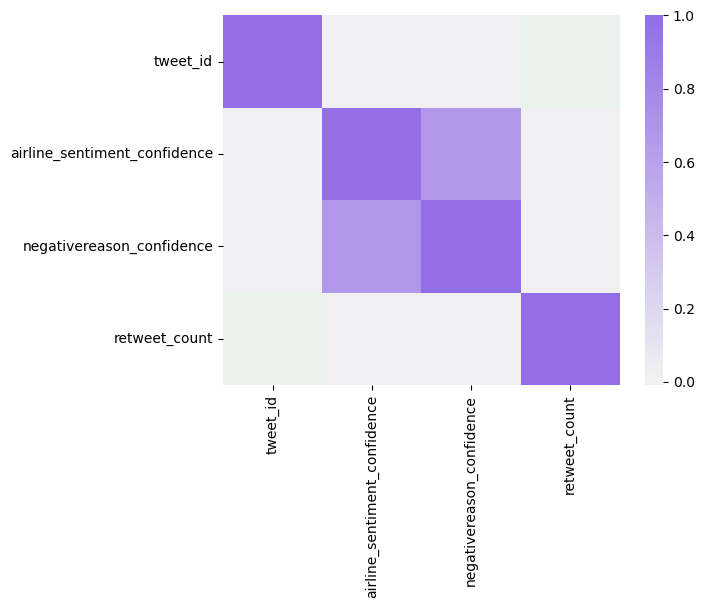

In [143]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(tweets.corr(), center=0, cmap=colors, robust=True)
plt.show()


## Plotting the counts of different Reasons for hate

In [144]:
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

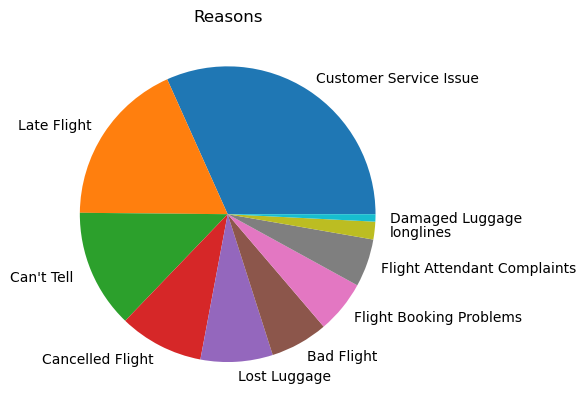

In [145]:
Reasons = ['Customer Service Issue'        ,
           'Late Flight'                  ,
           "Can't Tell "              ,
           'Cancelled Flight'                ,
           'Lost Luggage'                   ,
           'Bad Flight'                      ,
           'Flight Booking Problems'         ,
           'Flight Attendant Complaints'     ,
           'longlines'                       ,
           'Damaged Luggage']

plt.pie(tweets.negativereason.value_counts(), labels=Reasons)
plt.title('Reasons')
plt.show()

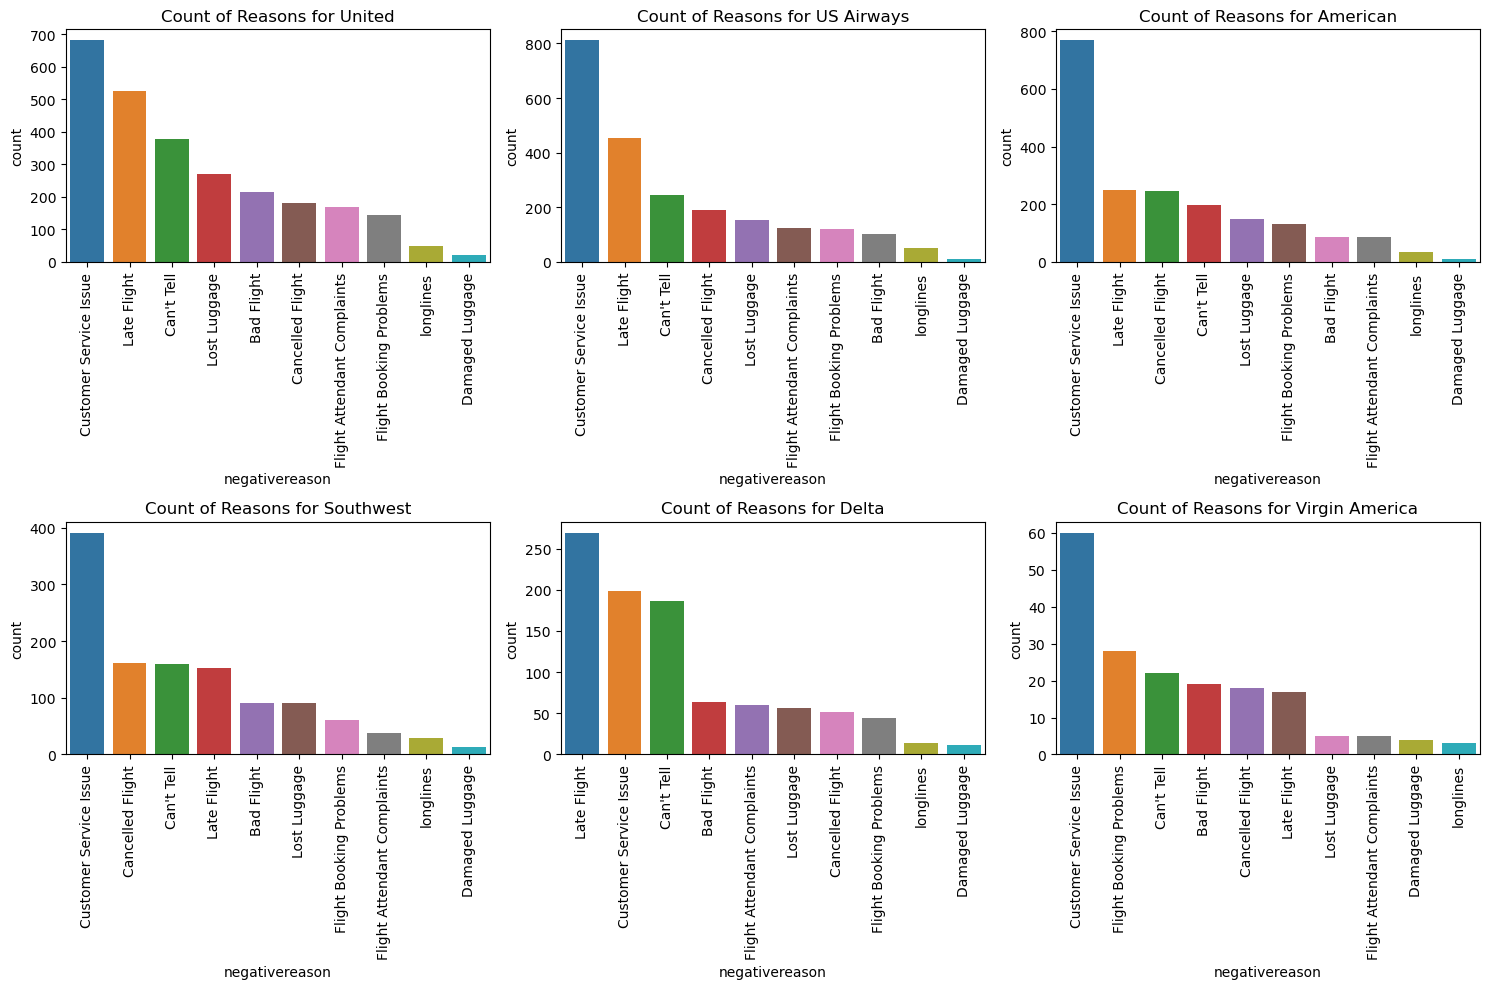

In [146]:
def plot_reason(Airline):
    df2 = tweets[tweets['airline'] == Airline]
    count = df2['negativereason'].value_counts().reset_index().rename(
        columns={'index': 'negativereason', 'negativereason': 'count'})
    sns.barplot(data=count, x='negativereason', y='count')
    plt.title('Count of Reasons for '+Airline)
    plt.xticks(rotation=90)


plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_reason('United')
plt.subplot(2, 3, 2)
plot_reason('US Airways')
plt.subplot(2, 3, 3)
plot_reason('American')
plt.subplot(2, 3, 4)
plot_reason('Southwest')
plt.subplot(2, 3, 5)
plot_reason('Delta')
plt.subplot(2, 3, 6)
plot_reason('Virgin America')
plt.tight_layout()
plt.show()

##  Distribution of Tweets text by Histogram

<Axes: xlabel='text', ylabel='Count'>

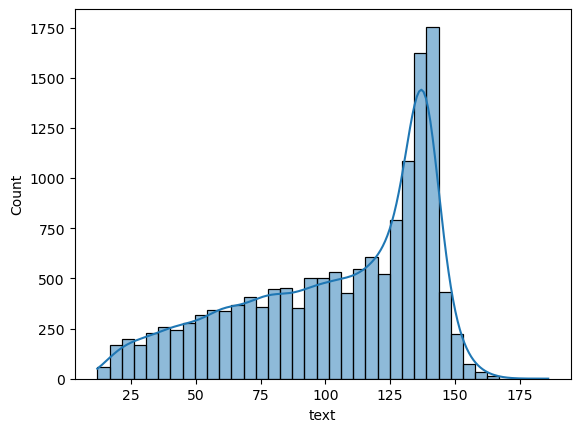

In [147]:
sns.histplot(tweets['text'].str.len(), kde=True)

## Distribution of Tweets text by Boxplot

<Axes: >

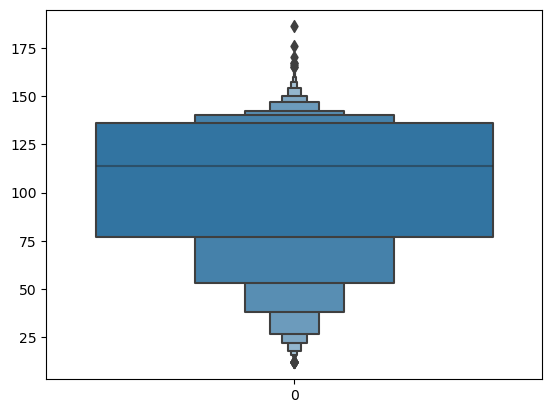

In [148]:
sns.boxenplot(tweets['text'].str.len())

## Wordcloud representation

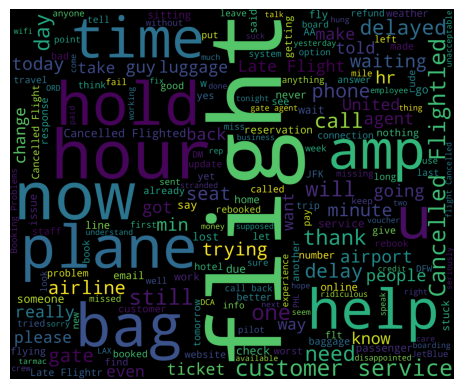

In [149]:
from wordcloud import WordCloud, STOPWORDS

df3 = tweets[tweets['airline_sentiment'] == 'negative']
words = ' '.join(df3['text'])
cleaned_word = ' '.join([word for word in words.split(
) if 'http' not in word and not word.startswith('@') and word != 'RT'])

wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Pre-Processing

### Mapping the Sentiments

The first thing we can do is to encode the categories with numbers. We will also create just 3 possible emotions: Positive, Neutral and Negative.

In [150]:
tweets.rename(columns={'airline_sentiment':'label'},inplace=True)
tweets.loc[:,'sentiment'] = tweets.label.map({'negative':0,'neutral':2,'positive':1})
tweets.head()

,tweet_id,label,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


### Dropping unnecessary features

In [151]:
tweets = tweets[['text', 'sentiment']]
tweets.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [152]:
!pip install tweet-preprocessor

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### Pre Processing tweets using tweet-preprocessor which removes urls,emojis and mentions(@)

In [153]:
import preprocessor as p

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [154]:
tweets['text'] = tweets.apply(preprocess_tweet, axis=1)
tweets.head()

,text,sentiment
0,What said.,2
1,plus you've added commercials to the experienc...,1
2,I didn't today... Must mean I need to take ano...,2
3,"it's really aggressive to blast obnoxious ""ent...",0
4,and it's a really big bad thing about it,0


### Removing digits and converting the text into lowercase

In [155]:
for i in range(len(tweets.text)):
    tweets.text[i] = tweets.text[i].lower()

tweets.head()

/tmp/ipykernel_28/3856898400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.text[i] = tweets.text[i].lower()


,text,sentiment
0,what said.,2
1,plus you've added commercials to the experienc...,1
2,i didn't today... must mean i need to take ano...,2
3,"it's really aggressive to blast obnoxious ""ent...",0
4,and it's a really big bad thing about it,0


### Removing punctuations

In [156]:
# Removing Punctuation:
def removePunctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [157]:
from tqdm import tqdm

for i in tqdm(range(len(tweets.text))):
    t = removePunctuation(tweets.text[i])
    temp = ""
    for ele in t:
        temp += str(ele)
    tweets.text[i] = temp
tweets.head()

  0%|          | 0/14640 [00:00<?, ?it/s]/tmp/ipykernel_28/2604464905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.text[i] = temp
100%|██████████| 14640/14640 [00:07<00:00, 1987.48it/s]


,text,sentiment
0,what said,2
1,plus youve added commercials to the experience...,1
2,i didnt today must mean i need to take another...,2
3,its really aggressive to blast obnoxious enter...,0
4,and its a really big bad thing about it,0


### Stopwords removal

In [158]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

for i in tqdm(range(len(tweets.text))):
    tweet = tweets.text[i]
    word_tokens = word_tokenize(tweet)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
        
    # Joining Back:
    tempTweet = ""
    for word in filtered_sentence:
        tempTweet += word + " "
    
    tweets.text[i] = tempTweet
    

  0%|          | 0/14640 [00:00<?, ?it/s]/tmp/ipykernel_28/2438965300.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.text[i] = tempTweet
100%|██████████| 14640/14640 [00:08<00:00, 1726.92it/s]


In [159]:
tweets.head()

,text,sentiment
0,said,2
1,plus youve added commercials experience tacky,1
2,didnt today must mean need take another trip,2
3,really aggressive blast obnoxious entertainmen...,0
4,really big bad thing,0


## Lemmetization

In [160]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [161]:
from nltk.stem import WordNetLemmatizer

lemmObject = WordNetLemmatizer()

for i in tqdm(range(len(tweets.text))):
    tweet = tweets.text[i]
    tweetList = tweet.split(" ")
    
    # Perform Lemmatization of tweetList:
    for j in range(len(tweetList)):
        word = tweetList[j]
        lemmWord = lemmObject.lemmatize(word)
        tweetList[j] = lemmWord
    
    # Join tweetList into a String:
    tempTweet = ""
    for ele in tweetList:
        tempTweet += ele + " "
    tweets.text[i] = tempTweet

  0%|          | 0/14640 [00:00<?, ?it/s]/tmp/ipykernel_28/3520221353.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.text[i] = tempTweet
100%|██████████| 14640/14640 [00:05<00:00, 2611.70it/s]


In [162]:
tweets.head(25)

,text,sentiment
0,said,2
1,plus youve added commercial experience tacky,1
2,didnt today must mean need take another trip,2
3,really aggressive blast obnoxious entertainmen...,0
4,really big bad thing,0
5,seriously would pay 30 flight seat didnt playi...,0
6,yes nearly every time fly vx ear worm wont go ...,1
7,really missed prime opportunity men without ha...,2
8,well didntbut,1
9,amazing arrived hour early youre good,1


# Deep Cleaning:

### Tokenization using BERT Tokenizer

In [163]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [164]:
token_lens = []

for txt in tweets['text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [165]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 38


In [166]:
token_lens = []

for i,txt in enumerate(tweets['text'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>40:
        print(f"INDEX: {i}, TEXT: {txt}")  

In [167]:
tweets['token_lens'] = token_lens
tweets.head()

,text,sentiment,token_lens
0,said,2,3
1,plus youve added commercial experience tacky,1,10
2,didnt today must mean need take another trip,2,11
3,really aggressive blast obnoxious entertainmen...,0,16
4,really big bad thing,0,6


### Arranging tweets according to token count

In [168]:
tweets = tweets.sort_values(by='token_lens', ascending=False)
tweets.head(10)

,text,sentiment,token_lens
6187,companion pas broken today purchaseerrorinvali...,2,38
2020,ticket12h biz trvlno wifimissed con fltnext on...,0,37
14427,aftr hr bng held hstg mia bc aa refsd get med ...,0,35
10467,flt last nght cancelled flightedmechprobs flt ...,0,33
12077,u r horriblewent online cancelled flight fligh...,2,33
11916,u r horriblewent online cancelled flight fligh...,2,33
10201,lost bag cant reach human delivery driver say ...,0,33
1875,pls hold ua2066 cnx pax frm ua6194 runner min ...,2,33
8731,big shoutout crew bosgtjfk amp jfkgtroc amp ga...,1,32
9537,customer service dead last wk flts delayedcanc...,0,32


In [169]:
tweets = tweets.sample(frac=1).reset_index(drop=True)

In [170]:
tweets.head()

,text,sentiment,token_lens
0,im flying airline,2,5
1,kept hanging made miss second flight,0,8
2,great job celebrating industry another reason ...,1,10
3,flight matter hell next wont get luggage prope...,0,12
4,thats corrective spent hour trying book online...,0,18


In [171]:
tweets.shape

(14640, 3)

### Defining the test data as 30 % of train data

In [172]:
testStart = int(0.7*tweets.shape[0])
tweets_test = tweets.iloc[testStart::]

In [173]:
tweets_test = tweets_test.sample(frac=1).reset_index(drop=True)

In [174]:
tweets_test.shape

(4392, 3)

In [175]:
tweets_test.head()

,text,sentiment,token_lens
0,30am customer service line trying scream,0,9
1,tremendous would recommend,2,5
2,seriously wtf,0,5
3,thanks charge anything end good,1,7
4,aa joke right line isnt even accepting call ri...,0,13


# Class balancing:

### Oversampling using RandomOverSampler()

We note that the three classes are imbalanced. We will proceed with oversampling the train test, to remove bias towards the majority classes.


In [176]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(tweets['text']).reshape(-1, 1), np.array(tweets['sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'sentiment']);

In [177]:
train_os['sentiment'].value_counts()

2    9178
0    9178
1    9178
Name: sentiment, dtype: int64

### Emotions after balancing

2    9178
0    9178
1    9178
Name: sentiment, dtype: int64


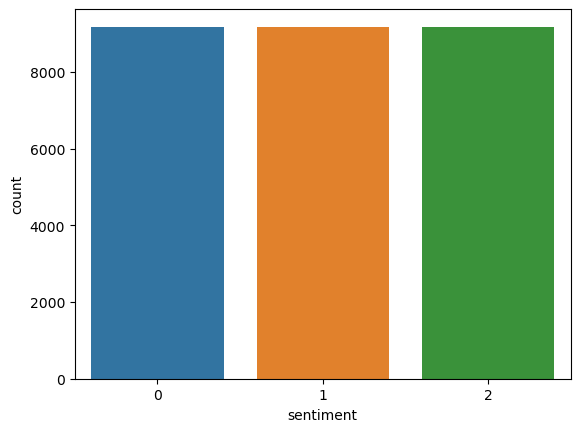

In [178]:
print(train_os['sentiment'].value_counts())
sns.countplot(data=train_os, x='sentiment')
plt.show()

In [179]:
X = train_os['text'].values
y = train_os['sentiment'].values

In [180]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [181]:
X_test = tweets_test['text'].values
y_test = tweets_test['sentiment'].values

# Feature engineering

### Part Of Speech(POS) tagging as new feature

 Adding part-of-speech tags to the text data can provide information about the grammatical structure and syntactic patterns. This additional feature can help the model capture linguistic cues that are relevant to sentiment analysis.

In [196]:
from nltk import pos_tag

In [197]:
from nltk.tokenize import word_tokenize

In [271]:
posTagsList = []
for i in tqdm(range(len(tweets.text))):
    # Tokens List:
    tokens = word_tokenize(tweets.text[i])
    posTagsList.append(pos_tag(tokens))

tweets["pos_tags"] = posTagsList

100%|██████████| 14640/14640 [00:15<00:00, 971.15it/s] 


In [272]:
tweets

,text,sentiment,token_lens,sentiment_scores,sentiment_polarity,word_embeddings,pos_tags
0,im flying airline,2,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,"[-0.003588278, 0.081766754, 0.12356403, -0.058...","[(im, NN), (flying, VBG), (airline, NN)]"
1,kept hanging made miss second flight,0,8,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",negative,"[-0.04887261, 0.06616146, 0.14484708, -0.06102...","[(kept, NN), (hanging, VBG), (made, VBD), (mis..."
2,great job celebrating industry another reason ...,1,10,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",positive,"[-0.057437442, 0.017684022, 0.17938684, 0.0364...","[(great, JJ), (job, NN), (celebrating, VBG), (..."
3,flight matter hell next wont get luggage prope...,0,12,"{'neg': 0.362, 'neu': 0.551, 'pos': 0.087, 'co...",negative,"[-0.0067647593, 0.026775394, 0.13740297, -0.07...","[(flight, NN), (matter, NN), (hell, NN), (next..."
4,thats corrective spent hour trying book online...,0,18,"{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...",negative,"[-0.038282026, -0.009270304, 0.1830578, 0.0211...","[(thats, NNS), (corrective, VBP), (spent, JJ),..."
...,...,...,...,...,...,...,...
14635,dfw gate bmi agent seriously beyond incompeten...,0,19,"{'neg': 0.324, 'neu': 0.539, 'pos': 0.137, 'co...",negative,"[-0.051887453, 0.061869986, 0.17733093, 0.0088...","[(dfw, NN), (gate, NN), (bmi, NN), (agent, NN)..."
14636,really appreciate follow always fly yall reason,1,10,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",positive,"[-0.0073720072, 0.06791284, 0.15707774, -0.006...","[(really, RB), (appreciate, JJ), (follow, NN),..."
14637,delacy p compassionate professional despite fl...,1,15,"{'neg': 0.082, 'neu': 0.536, 'pos': 0.382, 'co...",positive,"[-0.05782692, 0.027179504, 0.16705547, -0.0118...","[(delacy, NN), (p, NN), (compassionate, VBP), ..."
14638,client hr layover iah day claim amp recheck lu...,2,17,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",positive,"[-0.03469218, 0.023907706, 0.16564445, -0.0327...","[(client, NN), (hr, NN), (layover, NN), (iah, ..."


### Word embedding as a new feature

Word embedding techniques such as Word2Vec can be used to represent words as dense vectors. These vectors capture semantic relationships between words, allowing the model to understand the meaning and context of the text data more effectively.

In [200]:
from gensim.models import Word2Vec

In [226]:
# Train Word2Vec model on the processed tweets
model = Word2Vec(tweets['text'], vector_size=100,window=5, min_count=1)

def get_tweet_embedding(tweet):
    embedding = []
    for word in tweet:
        if word in model.wv.key_to_index:
            embedding.append(model.wv[word])
    if embedding:
        return np.mean(embedding, axis=0)
    else:
        return np.zeros(100)  # Return zero vector if no valid word embeddings found

In [227]:
# Calculate word embeddings for each tweet
tweets['word_embeddings'] = tweets['text'].apply(get_tweet_embedding)

In [228]:
tweets

,text,sentiment,token_lens,sentiment_scores,sentiment_polarity,word_embeddings
0,im flying airline,2,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,"[-0.003588278, 0.081766754, 0.12356403, -0.058..."
1,kept hanging made miss second flight,0,8,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",negative,"[-0.04887261, 0.06616146, 0.14484708, -0.06102..."
2,great job celebrating industry another reason ...,1,10,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",positive,"[-0.057437442, 0.017684022, 0.17938684, 0.0364..."
3,flight matter hell next wont get luggage prope...,0,12,"{'neg': 0.362, 'neu': 0.551, 'pos': 0.087, 'co...",negative,"[-0.0067647593, 0.026775394, 0.13740297, -0.07..."
4,thats corrective spent hour trying book online...,0,18,"{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...",negative,"[-0.038282026, -0.009270304, 0.1830578, 0.0211..."
...,...,...,...,...,...,...
14635,dfw gate bmi agent seriously beyond incompeten...,0,19,"{'neg': 0.324, 'neu': 0.539, 'pos': 0.137, 'co...",negative,"[-0.051887453, 0.061869986, 0.17733093, 0.0088..."
14636,really appreciate follow always fly yall reason,1,10,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",positive,"[-0.0073720072, 0.06791284, 0.15707774, -0.006..."
14637,delacy p compassionate professional despite fl...,1,15,"{'neg': 0.082, 'neu': 0.536, 'pos': 0.382, 'co...",positive,"[-0.05782692, 0.027179504, 0.16705547, -0.0118..."
14638,client hr layover iah day claim amp recheck lu...,2,17,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",positive,"[-0.03469218, 0.023907706, 0.16564445, -0.0327..."


### Sentiment Intensity as new feature

Calculating sentiment intensity scores for each tweet can be a valuable feature. This involves assigning weights or scores to words based on their sentiment polarity and intensity. By aggregating these scores for each tweet, we can capture the overall sentiment expressed more accurately.


In [204]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [205]:
sia = SentimentIntensityAnalyzer()

In [233]:
# Calculate sentiment intensity scores for each tweet
tweets['sentiment_scores'] = tweets['text'].apply(lambda x: sia.polarity_scores(x))

In [234]:
tweets

,text,sentiment,token_lens,sentiment_scores,sentiment_polarity,word_embeddings
0,im flying airline,2,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,"[-0.003588278, 0.081766754, 0.12356403, -0.058..."
1,kept hanging made miss second flight,0,8,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",negative,"[-0.04887261, 0.06616146, 0.14484708, -0.06102..."
2,great job celebrating industry another reason ...,1,10,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",positive,"[-0.057437442, 0.017684022, 0.17938684, 0.0364..."
3,flight matter hell next wont get luggage prope...,0,12,"{'neg': 0.362, 'neu': 0.551, 'pos': 0.087, 'co...",negative,"[-0.0067647593, 0.026775394, 0.13740297, -0.07..."
4,thats corrective spent hour trying book online...,0,18,"{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...",negative,"[-0.038282026, -0.009270304, 0.1830578, 0.0211..."
...,...,...,...,...,...,...
14635,dfw gate bmi agent seriously beyond incompeten...,0,19,"{'neg': 0.324, 'neu': 0.539, 'pos': 0.137, 'co...",negative,"[-0.051887453, 0.061869986, 0.17733093, 0.0088..."
14636,really appreciate follow always fly yall reason,1,10,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",positive,"[-0.0073720072, 0.06791284, 0.15707774, -0.006..."
14637,delacy p compassionate professional despite fl...,1,15,"{'neg': 0.082, 'neu': 0.536, 'pos': 0.382, 'co...",positive,"[-0.05782692, 0.027179504, 0.16705547, -0.0118..."
14638,client hr layover iah day claim amp recheck lu...,2,17,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",positive,"[-0.03469218, 0.023907706, 0.16564445, -0.0327..."


In [273]:
correlation_matrix = tweets.corr()

# Print the covariance matrix
print(correlation_matrix)

            sentiment  token_lens
sentiment    1.000000   -0.292668
token_lens  -0.292668    1.000000


/tmp/ipykernel_28/1065016689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tweets.corr()


<Axes: >

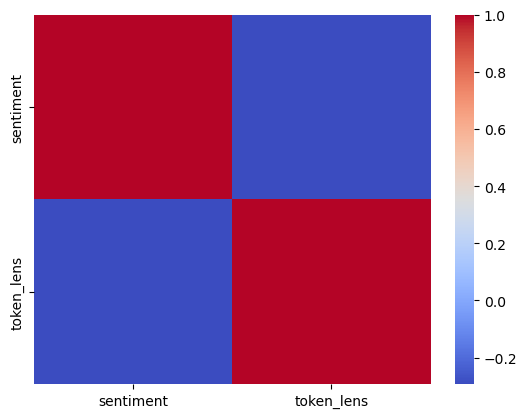

In [237]:
# Plot the covariance matrix as a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')

In [238]:
# Calculate the covariance matrix
covariance_matrix = tweets.cov()

# Print the covariance matrix
print(covariance_matrix)

            sentiment  token_lens
sentiment    0.666221   -1.192592
token_lens  -1.192592   24.923913


/tmp/ipykernel_28/2625658455.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = tweets.cov()


<Axes: >

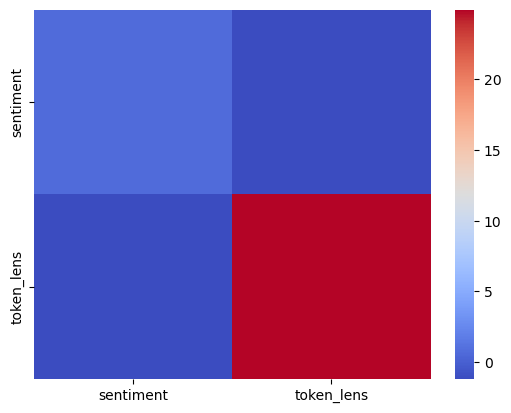

In [239]:
# Plot the covariance matrix as a heatmap
sns.heatmap(covariance_matrix, cmap='coolwarm')

# One Hot Encoding:

In [240]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [241]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [242]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 24780
VALIDATION DATA: 2754
TESTING DATA: 4392


# Naive Bayes-Classifier:

Before implementing BERT, we will define a simple Naive Bayes baseline model to classify the tweets.

First we need to tokenize the tweets using CountVectorizer.

In [243]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

Then we create the TF-IDF (term-frequency times inverse document-frequency) versions of the tokenized tweets.

In [244]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

Define the Naive Bayes Classifier model

In [245]:
# Defining Naive BAyes classifier model:
nb_clf = MultinomialNB()

In [246]:
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

In [247]:
nb_pred = nb_clf.predict(X_test_tf)

In [248]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      2702
     Neutral       0.75      0.90      0.81       709
    Positive       0.76      0.76      0.76       981

    accuracy                           0.86      4392
   macro avg       0.81      0.85      0.83      4392
weighted avg       0.86      0.86      0.86      4392



In [249]:
confusion_matrix_result = confusion_matrix(y_test_le, nb_pred)
print(confusion_matrix_result)


[[2370  126  206]
 [  37  636   36]
 [ 141   90  750]]


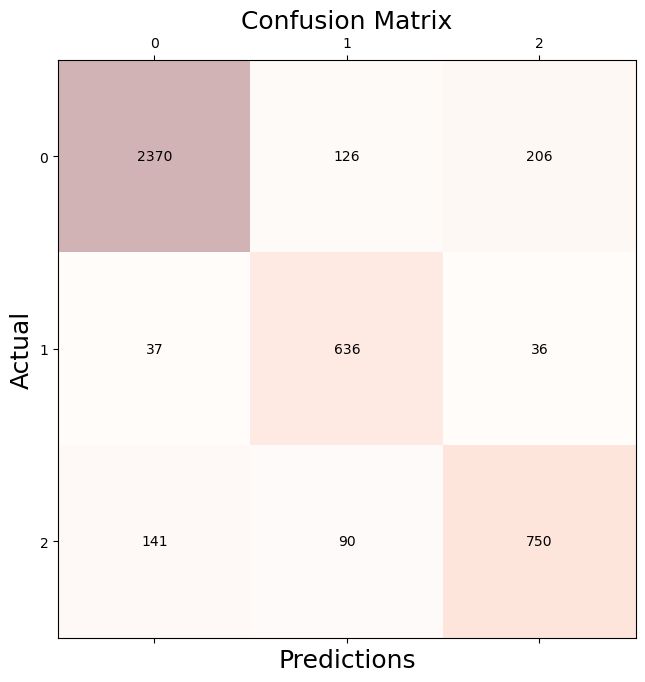

In [268]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix_result, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion_matrix_result.shape[0]):
    for j in range(confusion_matrix_result.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_result[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# BERT:

We already performed a basic analyis of the tokenized sentences, now we just need to define a custom tokenizer function and call the encode_plus method of the BERT tokenizer.

In [251]:
MAX_LEN=128

In [252]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

Then, we apply the tokenizer function to the train, validation and test sets.

In [253]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

Now we can import the BERT model from the pretrained library from Hugging face.


In [254]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Then, we create a custom function to host the pre trained BERT model, and attach to it a 3 neurons output layer, necessary to perform the classification of the 3 different classes of the dataset (the 3 emotions).

In [255]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, weight_decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [256]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

Finally we can start fine tuning the BERT transformer  

In [257]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
775/775 [==============================] - 437s 501ms/step - loss: 0.6128 - categorical_accuracy: 0.7442 - val_loss: 0.4150 - val_categorical_accuracy: 0.8435
Epoch 2/4
775/775 [==============================] - 389s 503ms/step - loss: 0.3353 - categorical_accuracy: 0.8769 - val_loss: 0.2855 - val_categorical_accuracy: 0.8994
Epoch 3/4
775/775 [==============================] - 389s 502ms/step - loss: 0.1959 - categorical_accuracy: 0.9329 - val_loss: 0.2269 - val_categorical_accuracy: 0.9198
Epoch 4/4
775/775 [==============================] - 383s 494ms/step - loss: 0.1211 - categorical_accuracy: 0.9600 - val_loss: 0.2126 - val_categorical_accuracy: 0.9368


In [259]:
# BERT Results:
result_bert = model.predict([test_input_ids,test_attention_masks])

138/138 [==============================] - 26s 166ms/step


In [260]:
from sklearn.metrics import classification_report, confusion_matrix

In [261]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [262]:
confusion_matrix(y_test.argmax(1), y_pred_bert.argmax(1))

array([[2633,   12,   57],
       [   2,  699,    8],
       [  12,   13,  956]])

In [263]:
conf_matrix = confusion_matrix(y_test.argmax(1), y_pred_bert.argmax(1))
conf_matrix

array([[2633,   12,   57],
       [   2,  699,    8],
       [  12,   13,  956]])

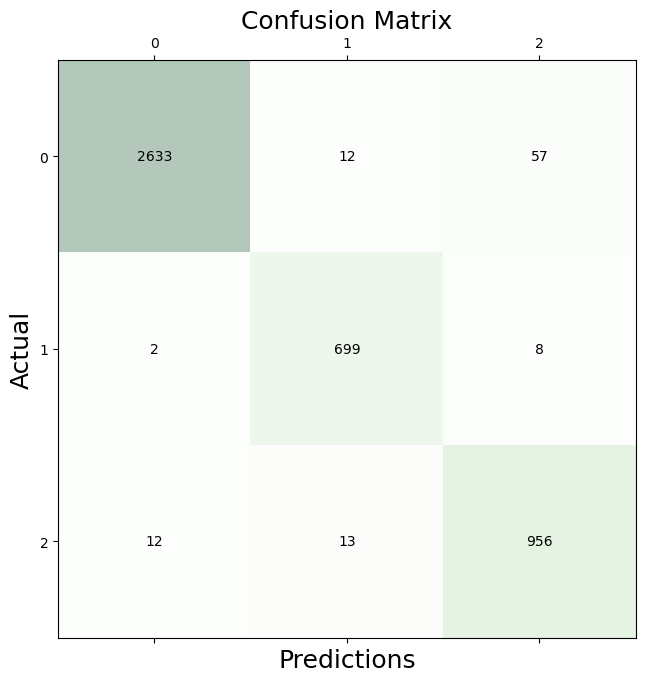

In [270]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [267]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.99      0.97      0.98      2702
     Neutral       0.97      0.99      0.98       709
    Positive       0.94      0.97      0.96       981

   micro avg       0.98      0.98      0.98      4392
   macro avg       0.97      0.98      0.97      4392
weighted avg       0.98      0.98      0.98      4392
 samples avg       0.98      0.98      0.98      4392

